# Problem Statement

- Create a ML Model which predicts whether a Client purchase a term deposit or not, based on Age and Salary features
- 1 = Purchased ;   0 = Not Purchased

In [1]:
# Importing the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
training_data = pd.read_csv('../ml_classification/storepurchasedata.csv')
training_data

,Age,Salary,Purchased
0,18,20000,0
1,19,22000,0
2,20,24000,0
3,21,28000,0
4,22,50000,1
...,...,...,...
35,56,45000,1
36,57,56000,1
37,58,80000,1
38,59,90000,1


In [38]:
training_data.describe()

,Age,Salary,Purchased
count,40.000000,40.000000,40.000000
mean,38.100000,49525.000000,0.550000
std,12.557151,19046.484971,0.503831
min,18.000000,20000.000000,0.000000
25%,27.750000,35000.000000,0.000000
50%,37.500000,48500.000000,1.000000
75%,47.250000,60000.000000,1.000000
max,60.000000,95000.000000,1.000000


# Split the Data into X and y

In [6]:
X = training_data.iloc[:, :-1].values
y = training_data.iloc[:,-1].values

In [7]:
X

array([[   18, 20000],
       [   19, 22000],
       [   20, 24000],
       [   21, 28000],
       [   22, 50000],
       [   23, 35000],
       [   24, 30000],
       [   25, 32000],
       [   26, 35000],
       [   27, 37000],
       [   28, 80000],
       [   29, 40000],
       [   30, 45000],
       [   31, 50000],
       [   32, 45000],
       [   33, 47000],
       [   34, 46000],
       [   35, 56000],
       [   36, 60000],
       [   37, 23000],
       [   38, 53000],
       [   39, 30000],
       [   40, 60000],
       [   41, 63000],
       [   42, 45000],
       [   43, 52000],
       [   44, 51000],
       [   45, 60000],
       [   46, 22000],
       [   47, 55000],
       [   48, 53000],
       [   50, 45000],
       [   52, 65000],
       [   54, 78000],
       [   55, 78000],
       [   56, 45000],
       [   57, 56000],
       [   58, 80000],
       [   59, 90000],
       [   60, 95000]], dtype=int64)

In [8]:
y

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [9]:
training_data.rename(columns={'Purchased': 'target'}, inplace=True)
def target_plot(df):
    fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

    plt.subplot(1,2,1)
    palette = ["#ADD8E6", "#EFB000"]
    plt.pie(df['target'].value_counts(), labels = ['1','0'], 
            autopct = '%1.2f%%',
            startangle = 90, shadow = True,
            explode = (0.01,0.01),
            colors = palette,
            wedgeprops = {'edgecolor': 'grey','linewidth': 1})
    plt.title('Division in percentage');

    plt.subplot(1,2,2)
    colors = ['#FFD700','#3B3B3C']
    ax = sns.countplot(x=df['target'], 
                       palette = colors, 
                       edgecolor = 'black')
    for i in ax.containers:
        ax.bar_label(i,)
    ax.set_xticklabels(['0','1'])

    plt.title('\n Class Distributions count')
    plt.show()

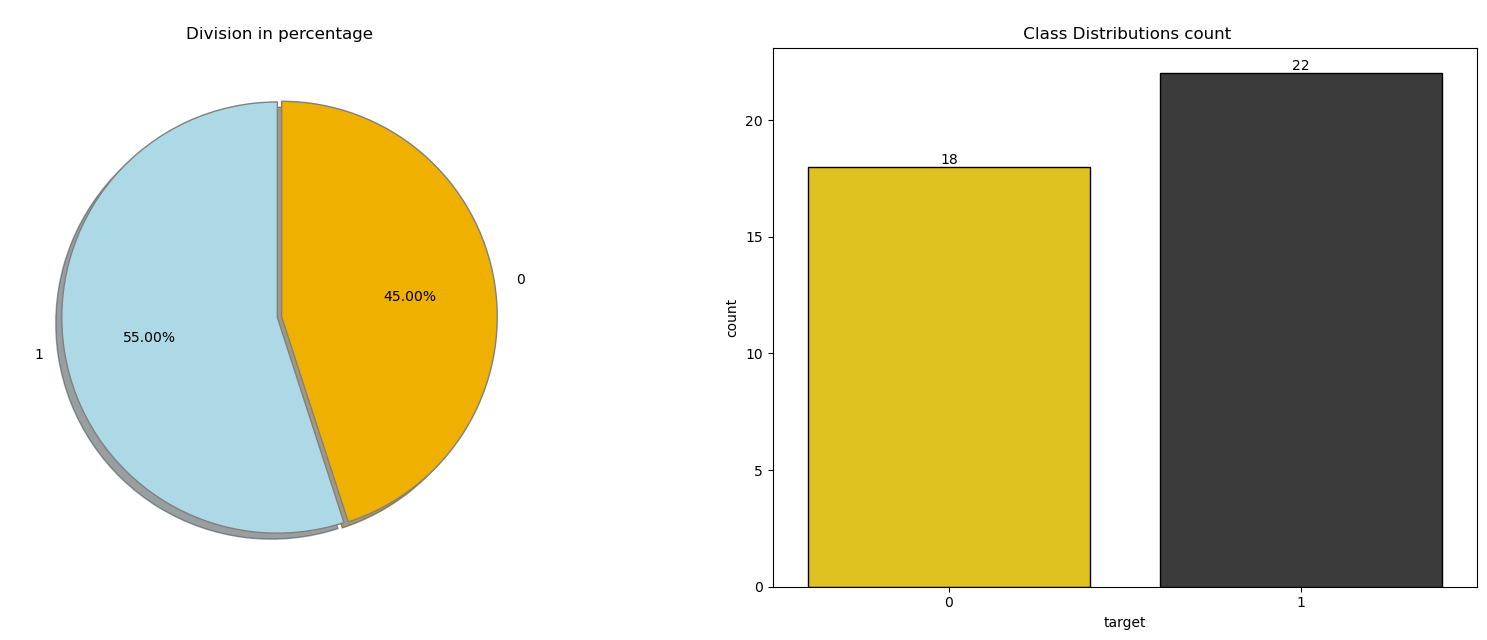

In [10]:
target_plot(training_data)
# The dataset is Balanced, with 

In [12]:
print(training_data.describe().T)
training_data['target'].value_counts()

        count      mean           std      min       25%      50%       75%  \
Age      40.0     38.10     12.557151     18.0     27.75     37.5     47.25   
Salary   40.0  49525.00  19046.484971  20000.0  35000.00  48500.0  60000.00   
target   40.0      0.55      0.503831      0.0      0.00      1.0      1.00   

            max  
Age        60.0  
Salary  95000.0  
target      1.0  


1    22
0    18
Name: target, dtype: int64

# Split the Data into Training and Testing

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.20,random_state=0)

## Scale the Training data and transform the Test data

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32, 2), (8, 2), (32,), (8,))

In [18]:
X_train, X_test, y_train, y_test

(array([[-0.22030803,  0.54818427],
        [ 0.61354601,  0.29247149],
        [ 0.46193618,  0.54818427],
        [ 1.29579021, -0.21895407],
        [ 1.44740004,  1.5710354 ],
        [-1.43318661, -1.29294775],
        [ 1.59900986,  2.33817374],
        [ 0.68935092,  0.19018638],
        [ 1.2199853 ,  1.46875029],
        [-0.37191785, -0.16781151],
        [ 1.37159512,  0.34361405],
        [-0.97835714, -0.73037963],
        [-0.59933258,  0.03675871],
        [-1.20577188, -0.73037963],
        [-0.29611294,  0.34361405],
        [-0.52352767, -0.21895407],
        [ 1.14418039,  1.46875029],
        [-1.05416206, -0.8838073 ],
        [ 0.99257056,  0.80389706],
        [-1.50899153, -1.39523286],
        [ 0.38613127,  0.08790127],
        [-0.6751375 , -0.21895407],
        [ 0.84096074, -0.21895407],
        [ 0.23452145, -0.21895407],
        [-1.12996697, -0.98609241],
        [ 0.15871653,  0.70161194],
        [ 0.00710671, -0.98609241],
        [-0.14450311, -1.344

## Applying KNN Algorithm

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# minkowski is for ecledian distance, p=2 for Eucledian distance calculation
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

## Model training

In [20]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Model Testing 

In [21]:
y_pred = classifier.predict(X_test)

y_prob = classifier.predict_proba(X_test)[:,1]

## Model Evaluation

In [22]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [23]:
cm

array([[3, 0],
       [1, 4]], dtype=int64)

In [24]:
# Accuracy Score
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.875


In [25]:
# Classification Matrix
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8



## New Prediction using the Model

In [28]:
# The new data should also be Featured Scaled, since the Model is Trained on Scaled data

new_prediction = classifier.predict(sc.transform(np.array([[40,20000]])))
new_prediction

array([0], dtype=int64)

**Let's Check the Probability for the Same!**

In [29]:
new_prediction_proba = classifier.predict_proba(sc.transform(np.array([[40,20000]])))[:,1]
new_prediction_proba

array([0.2])

In [30]:
new_pred = classifier.predict(sc.transform(np.array([[42,50000]])))
new_pred

array([1], dtype=int64)

In [33]:
new_pred_proba = classifier.predict_proba(sc.transform(np.array([[42,50000]])))[:,1]
new_pred_proba

array([0.8])

# Pickling the MODEL and Scaler Object

In [34]:
# Picking the Model and Standard Scaler Objects
# Pickle - To Serialize a Python Object / To Convert Byte Stream
import pickle

## Model file

In [35]:
model_file = "classifier.pickle"
pickle.dump(classifier, open(model_file,'wb'))

## Scaler file

In [36]:
scaler_file = "sc.pickle"
pickle.dump(sc, open(scaler_file,'wb'))

## Evaluation Metrics of KNN Classifier

In [41]:
# Define a colormap
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
royalblue_r = royalblue.reversed()

from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# To evaluate the performance of the model, we define a function so that it can be used to evaluate subsequent models as well:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result


def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports, 
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show() 



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.94      0.94      0.94        17

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8



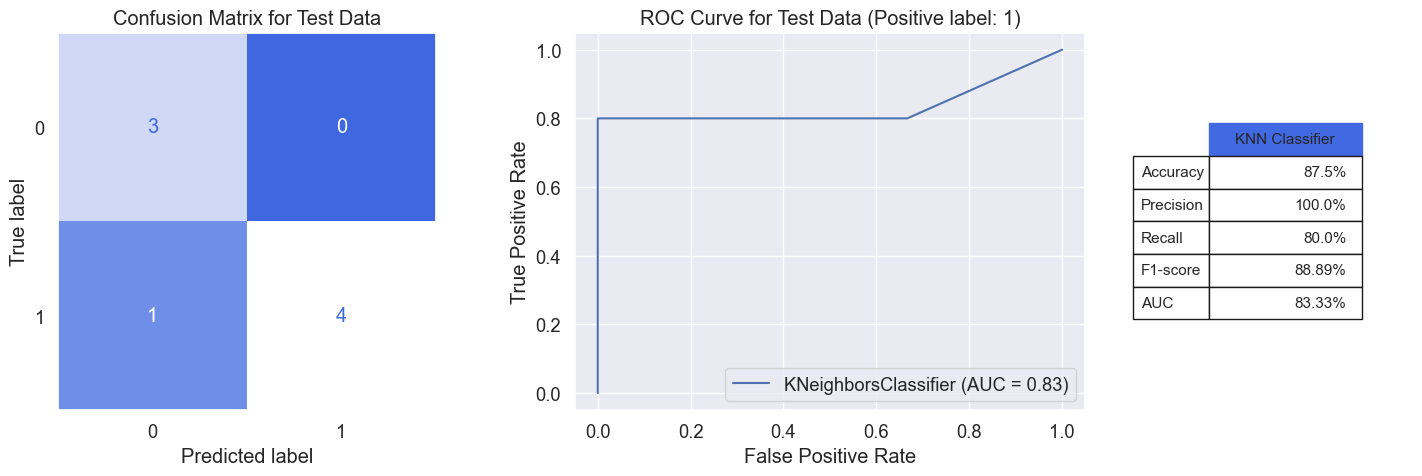

In [42]:
# FOR Test Set Evaluation Results:
model_evaluation(classifier, X_train, X_test, y_train, y_test, 'KNN Classifier')

# XGBOOST Classifier

In [43]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

In [45]:
# Define imbalance ratio
ratio = sum(y_train==0)/sum(y_train==1) 

# Define the hyperparameter grid to search
xgb_param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [ratio, ratio*1.3, ratio*1.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'colsample_bylevel': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'max_delta_step': [0, 1, 2],
    'gamma': [0, 0.1, 1],
    'max_leaf_nodes': [2, 4, 6]
}

In [143]:
# Initialize the XGBoost Classifier
xgb = XGBClassifier(max_depth=5,
                        learning_rate=0.3,
                        n_estimators=200,
                        min_child_weight=1,
                        scale_pos_weight=1.5,
                        colsample_bytree=0.8,
                        gamma=0.1,
                        booster='gbtree',
                        objective='binary:logistic',
                        eval_metric='error', 
                        random_state=0)

# Train the XGBoost Classifier
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [65]:
training_data.columns

Index(['Age', 'Salary', 'Purchased'], dtype='object')

In [110]:
X = training_data.drop('Purchased', axis=1)
y = training_data['Purchased'] 

In [111]:
X.columns

Index(['Age', 'Salary'], dtype='object')

<IPython.core.display.Javascript object>


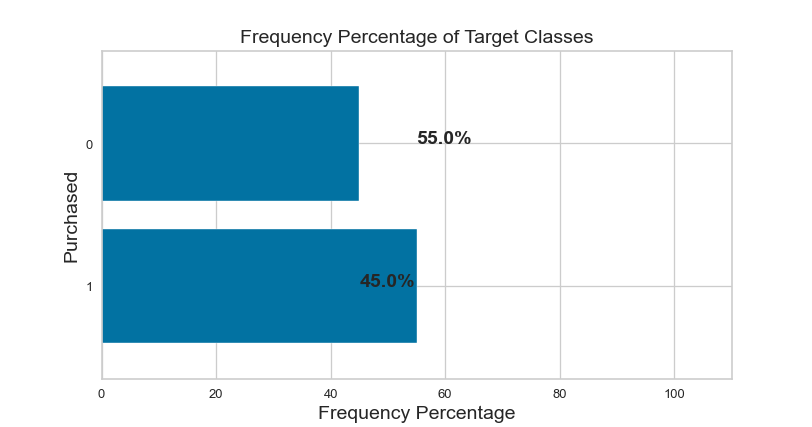

In [155]:
%matplotlib notebook
#%matplotlib inline

plt.figure(dpi=100)

# Plot frequency percentages barplot
training_data['Purchased'].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,4))

# Add frequency percentages to the plot
labels = training_data['Purchased'].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=15)
plt.ylabel('Purchased', fontsize=15)
plt.title('Frequency Percentage of Target Classes', fontsize=15)
plt.show()

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0, stratify=y)

In [147]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

%matplotlib inline

from sklearn.base import clone 
# Define a scorer function
def f1_metric(model, X_train, y_train):
    '''
    This function reports f1-score metric for the class specified by 'Positive Label' (or '1')
    '''
    return f1_score(y_train, model.predict(X_train), average='binary')


def drop_column_importance(model, X_train, y_train, random_state=0):
    # list containing feature importances
    importances = []
    # Clone the model
    model_clone = clone(model)
    # Set random_state for comparability
    model_clone.random_state = random_state
    # Train the model
    model_clone.fit(X_train, y_train)
    # Create the cross-validation object using StratifiedKFold 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # Score the benchmark model using cross-validation
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring=f1_metric).mean()

    
    # Iterate over all features and store feature importance
    for col in X_train.columns:
        # Clone the model
        model_clone = clone(model)
        # Set random_state for comparability
        model_clone.random_state = random_state
        # Traint the model on the the dataset with a single feature removed
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        # Score the droped-column model
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring=f1_metric).mean()
        # Store feature importance which is defined as the difference between the benchmark and the new model score
        importances.append(benchmark_score - drop_column_score)
        
    # Return the features along with their importances in the form of a dataframe
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)
           
    return importances_df                  

def drop_column_importance_plot(model, X_train, y_train):
    # Call drop-column feature importance function
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    # Rename columns
    df_drop_column.columns = ['Feature', 'Feature Importance']
    
    # Plot barchart
    plt.figure(figsize=(8,5))
    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h', color='royalblue')
    plt.title('Drop Column Feature Importance', fontsize=20)
    plt.show()

<Figure size 128x96 with 0 Axes>

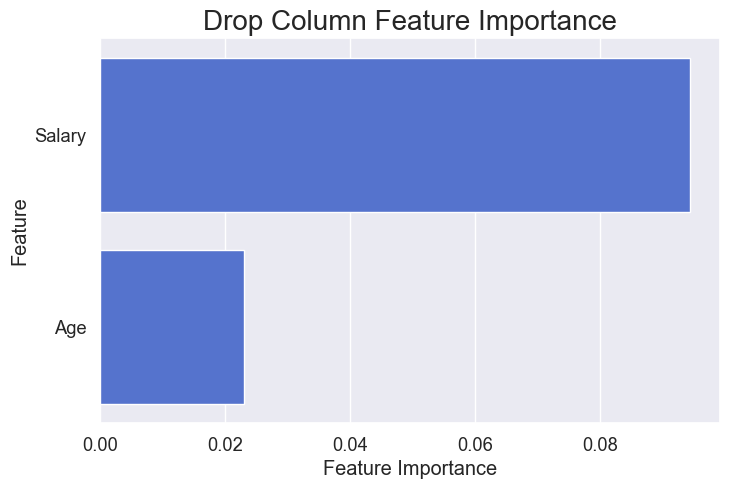

In [148]:
plt.figure(dpi=20)
drop_column_importance_plot(xgb, X_train, y_train)

In [144]:
# Train the XGBoost Classifier
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



<IPython.core.display.Javascript object>


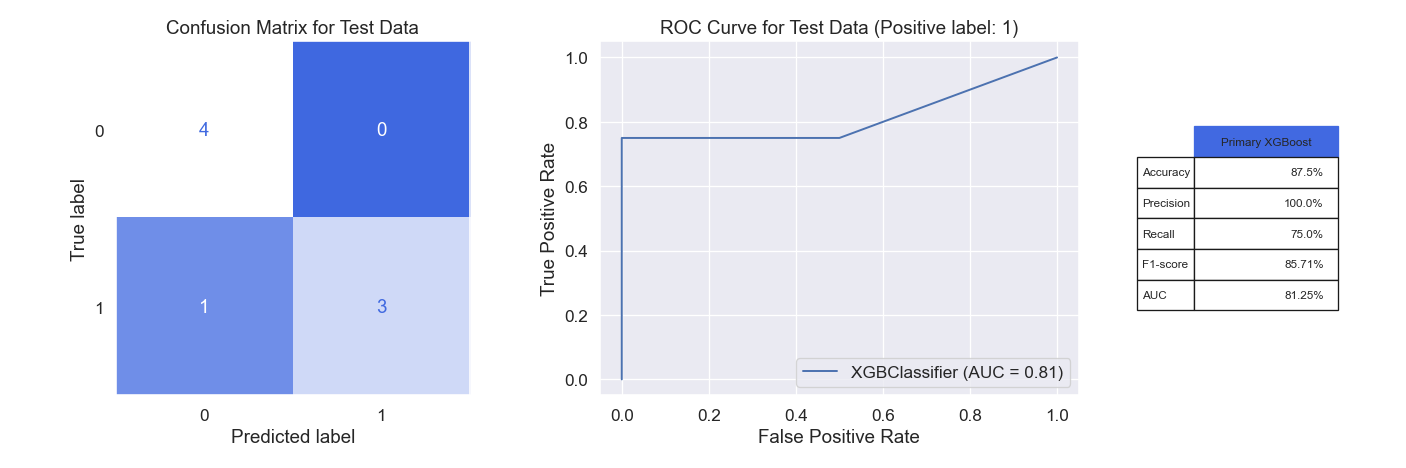

In [145]:
model_evaluation(xgb, X_train, X_test, y_train, y_test, 'Primary XGBoost')